# IMPORT DATASETS

In [1]:
import pandas as pd
import numpy as np
from arch import arch_model

stock_data={
    'Axis_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Axis_Bank.csv',index_col=0),    
    'Bajaj_Finance':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Bajaj_Finance.csv',index_col=0),    
    'Coal_India':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Coal_India.csv',index_col=0),    
    'HCL_Tech':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/HCL_Tech.csv',index_col=0),    
    'HDFC_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/HDFC_Bank.csv',index_col=0),    
    'Hindustan_Unilever':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Hindustan_Unilever.csv',index_col=0),
    'ICICI_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/ICICI_Bank.csv',index_col=0),
    'Infosys':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Infosys.csv',index_col=0),
    'ITC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/ITC.csv',index_col=0),
    'Kotak_Mahindra':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Kotak_Mahindra.csv',index_col=0),    
    'L&T':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/L&T.csv',index_col=0),    
    'Maruti_Suzuki':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Maruti_Suzuki.csv',index_col=0),    
    'NTPC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/NTPC.csv',index_col=0),    
    'ONGC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/ONGC.csv',index_col=0),
    'PowerGrid_Corp':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/PowerGrid_Corp.csv',index_col=0),
    'Reliance_Industries':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Reliance_Industries.csv',index_col=0),
    'SBI':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/SBI.csv',index_col=0),
    'Tata_Motors':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Tata_Motors.csv',index_col=0),
    'TCS':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/TCS.csv',index_col=0),
    'UltraTech':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/UltraTech.csv',index_col=0)

}


# ADDING RETURN COLUMN IN DATASET

In [2]:
# # No need to run this code again
# for company,data in stock_data.items():
#     df = data
#     # Calculate returns
#     returns = df['Close'].pct_change().dropna()
#     data['Returns'] = returns
#     df.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/'+ company + '.csv', sep = ",", index= False)


# # No need to run this code again
# for company,data in stock_data.items():
#     df = data
#     new_df = df.drop("Returns", axis='columns')
#     new_df.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/'+ company + '.csv', sep = ",", index= False)

In [3]:
d = pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets/Axis_Bank.csv',index_col=0)

In [4]:
d

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,620.250000,625.450012,617.549988,623.799988,622.216980,6047062
2021-01-04,627.799988,633.000000,621.299988,624.700012,623.114685,14068156
2021-01-05,618.000000,667.900024,618.000000,664.450012,662.763794,37973963
2021-01-06,662.000000,667.150024,649.150024,654.250000,652.589661,20829645
2021-01-07,659.000000,676.500000,659.000000,671.099976,669.396912,17887570
...,...,...,...,...,...,...
2024-03-21,1039.349976,1050.550049,1028.150024,1035.599976,1035.599976,9903738
2024-03-22,1040.099976,1047.250000,1029.949951,1033.300049,1033.300049,9891194
2024-03-26,1029.000000,1044.199951,1027.500000,1040.550049,1040.550049,9656767


# AIC FUNCTION

In [5]:
def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q,rescale=False)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value=p
                q_value=q

    return best_aic, best_order,p_value,q_value

# GARCH MODEL FUNCTION

In [6]:
def fit_garch_model_and_forecast_volatility(company, data, p_value, q_value):
    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Estimate GARCH(p,q) volatilities
    volatilities = {}
    for company in returns.columns:
        model = arch_model(returns[company], vol='Garch', p=p_value, q=q_value, rescale=False)
        res = model.fit(disp='off')
        volatilities[company] = res.conditional_volatility

    # Convert volatilities to DataFrame
    vol_df = pd.DataFrame(volatilities)
    
    # Reset index to preserve Date column
    vol_df.reset_index(inplace=True)
    returns.reset_index(inplace=True)
    
    
    vol_df = vol_df.drop(['High','Open','Low', 'Volume', 'Adj Close'], axis=1)
    returns = returns.drop(['High','Open','Low', 'Volume', 'Adj Close'], axis=1)
    return vol_df, returns

# AIC RESULTS

In [7]:
# Loop over each company's stock price data
actual_volatilities={}
thresholded_stocks = []
threshold = 0.05  # Define threshold for volatility

for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()
    
    rescaled_returns=returns
    squared_diff = rescaled_returns ** 2
    actual_volatilities[company] = squared_diff.mean()
    best_aic, best_order,p_value,q_value = select_best_order(rescaled_returns)
    print("Best AIC for:",company, best_aic)
    print("Best Order (p, q):", best_order)

    vol_df, df = fit_garch_model_and_forecast_volatility(company, data, p_value, q_value)
    vol_df.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_'+ company + '.csv', sep = ",", index= False)
    df.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_'+ company + '.csv', sep = ",", index= False)
#     forecasted_volatilities = np.array(list(volatility_results.values())).reshape(-1, 1)
    # Store the result in the dictionary

Best AIC for: Axis_Bank -4362.335567783504
Best Order (p, q): (1, 1)
Best AIC for: Bajaj_Finance -4105.649698747621
Best Order (p, q): (3, 4)
Best AIC for: Coal_India -4036.4012642543307
Best Order (p, q): (1, 4)
Best AIC for: HCL_Tech -4426.968163052792
Best Order (p, q): (1, 1)
Best AIC for: HDFC_Bank -4571.632928512456
Best Order (p, q): (4, 3)
Best AIC for: Hindustan_Unilever -4724.632352017566
Best Order (p, q): (1, 2)
Best AIC for: ICICI_Bank -4545.867112398357
Best Order (p, q): (1, 4)
Best AIC for: Infosys -4431.293657074002
Best Order (p, q): (1, 3)
Best AIC for: ITC -4624.164995964422
Best Order (p, q): (3, 2)
Best AIC for: Kotak_Mahindra -4548.094135178204
Best Order (p, q): (1, 2)
Best AIC for: L&T -5641.902357003549
Best Order (p, q): (1, 1)
Best AIC for: Maruti_Suzuki -4488.959246098183
Best Order (p, q): (1, 2)
Best AIC for: NTPC -4335.682197066116
Best Order (p, q): (1, 2)
Best AIC for: ONGC -4026.248758448403
Best Order (p, q): (2, 4)
Best AIC for: PowerGrid_Corp -4286

D:\Programs\anaconda3\Anaconda\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [8]:
df = pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_HCL_Tech.csv',index_col=0)
df2 = pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_HCL_Tech.csv',index_col=0)

In [9]:
df

,Close
Date,
2021-01-04,0.022177
2021-01-05,0.022093
2021-01-06,0.021061
2021-01-07,0.020262
2021-01-08,0.019665
...,...
2024-03-21,0.015451
2024-03-22,0.015080
2024-03-26,0.015725


In [10]:
df2

,Close
Date,
2021-01-04,0.031457
2021-01-05,0.011169
2021-01-06,-0.013265
2021-01-07,-0.015999
2021-01-08,0.033349
...,...
2024-03-21,0.005482
2024-03-22,-0.023781
2024-03-26,0.002824


# Garch and return dataset dictionary

In [11]:
garch={
    'Axis_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Axis_Bank.csv',index_col=0),
    'Bajaj_Finance':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Bajaj_Finance.csv',index_col=0),
    'Coal_India':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Coal_India.csv',index_col=0),
    'HCL_Tech':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_HCL_Tech.csv',index_col=0),
    'HDFC_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_HDFC_Bank.csv',index_col=0),
    'Hindustan_Unilever':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Hindustan_Unilever.csv',index_col=0),
    'ICICI_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_ICICI_Bank.csv',index_col=0),
            'Infosys':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Infosys.csv',index_col=0),
    'ITC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_ITC.csv',index_col=0),
    'Kotak_Mahindra':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Kotak_Mahindra.csv',index_col=0),
    'L&T':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_L&T.csv',index_col=0),
    'Maruti_Suzuki':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Maruti_Suzuki.csv',index_col=0),
    'NTPC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_NTPC.csv',index_col=0),
    'ONGC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_ONGC.csv',index_col=0),
    'PowerGrid_Corp':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_PowerGrid_Corp.csv',index_col=0),
    'Reliance_Industries':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Reliance_Industries.csv',index_col=0),
    'SBI':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_SBI.csv',index_col=0),
    'Tata_Motors':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_Tata_Motors.csv',index_col=0),
    'TCS':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_TCS.csv',index_col=0),
    'UltraTech':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_UltraTech.csv',index_col=0)

}


returns={
    'Axis_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Axis_Bank.csv',index_col=0),
    'Bajaj_Finance':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Bajaj_Finance.csv',index_col=0),
    'Coal_India':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Coal_India.csv',index_col=0),
    'HCL_Tech':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_HCL_Tech.csv',index_col=0),
    'HDFC_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_HDFC_Bank.csv',index_col=0),
    'Hindustan_Unilever':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Hindustan_Unilever.csv',index_col=0),
    'ICICI_Bank':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_ICICI_Bank.csv',index_col=0),
            'Infosys':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Infosys.csv',index_col=0),
    'ITC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_ITC.csv',index_col=0),
    'Kotak_Mahindra':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Kotak_Mahindra.csv',index_col=0),
    'L&T':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_L&T.csv',index_col=0),
    'Maruti_Suzuki':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Maruti_Suzuki.csv',index_col=0),
    'NTPC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_NTPC.csv',index_col=0),
    'ONGC':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_ONGC.csv',index_col=0),
    'PowerGrid_Corp':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_PowerGrid_Corp.csv',index_col=0),
    'Reliance_Industries':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Reliance_Industries.csv',index_col=0),
    'SBI':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_SBI.csv',index_col=0),
    'Tata_Motors':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_Tata_Motors.csv',index_col=0),
    'TCS':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_TCS.csv',index_col=0),
    'UltraTech':pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_UltraTech.csv',index_col=0)

}

In [12]:
d = pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_L&T.csv',index_col=0)
d2 = pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch_L&T.csv',index_col=0)

In [13]:
d

,Close
Date,
2020-01-02,0.026986
2020-01-03,-0.007619
2020-01-06,-0.013707
2020-01-07,0.002848
2020-01-08,-0.021923
...,...
2024-03-21,0.014332
2024-03-22,0.016236
2024-03-26,0.014456


In [14]:
d2

,Close
Date,
2020-01-02,0.019922
2020-01-03,0.020185
2020-01-06,0.019744
2020-01-07,0.019520
2020-01-08,0.018998
...,...
2024-03-21,0.016587
2024-03-22,0.016441
2024-03-26,0.016382


In [15]:
# d2 = d2.drop(d2.index[-251:])
# d = d.drop(d.index[-251:])

In [16]:
# d2.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/garch__L&T.csv', sep = ",", index= False)
# d.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Datasets2/returns_L&T.csv', sep = ",", index= False)

# Plots of Garch

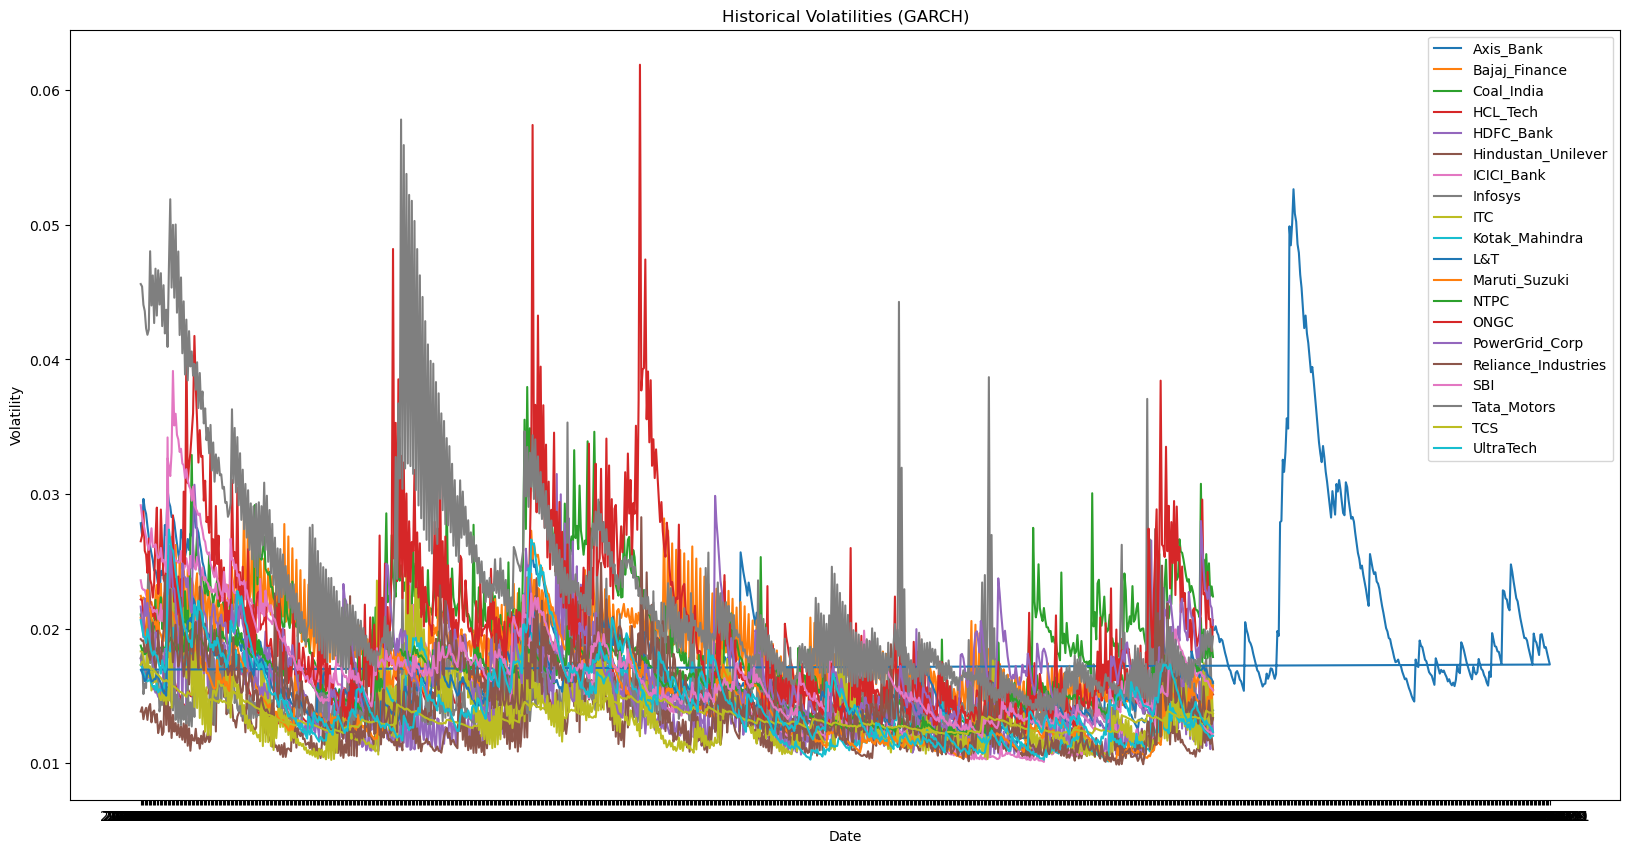

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for company, data in garch.items():
    plt.plot(data["Close"], label=company)
plt.title('Historical Volatilities (GARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Random Forest Algorithm

In [18]:
# random_forest_model.py
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def predict_volatilities(returns_dict, vol_dict):
    pred_vol_dict = {}
    y_test_dict = {}

    for company in returns_dict:
        # Prepare data
        vol_df = vol_dict[company]
        returns = returns_dict[company]

        # Ensure alignment of data
        merged_df = pd.merge(returns, vol_df, on='Date', suffixes=('_ret', '_vol'))
        merged_df.dropna(inplace=True)
        
        # Debugging data dimensions
        print(f"Company: {company}, Merged Data Shape: {merged_df.shape}")

        X = merged_df.filter(like='_ret').values
        y = merged_df.filter(like='_vol').values.flatten()

        # Confirm dimensions match
        print(f"X Shape: {X.shape}, y Shape: {y.shape}")

        if X.shape[0] != y.shape[0]:
            print(f"Skipping {company} due to dimension mismatch: X Shape: {X.shape[0]}, y Shape: {y.shape[0]}")
            continue

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Fit Random Forest model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)

        # Predict volatilities
        y_pred = rf.predict(X_test)

        # Store the predicted volatilities and test set
        pred_vol_dict[company] = y_pred
        y_test_dict[company] = y_test

    # Convert predictions to DataFrame for further processing
    pred_vol_df = pd.DataFrame.from_dict(pred_vol_dict, orient='index').transpose()
    y_test_df = pd.DataFrame.from_dict(y_test_dict, orient='index').transpose()
    
    return pred_vol_df, y_test_df


In [19]:
pred_vol_df, y_test_df = predict_volatilities(returns, garch)

Company: Axis_Bank, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: Bajaj_Finance, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: Coal_India, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: HCL_Tech, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: HDFC_Bank, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: Hindustan_Unilever, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: ICICI_Bank, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: Infosys, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: ITC, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: Kotak_Mahindra, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape: (800,)
Company: L&T, Merged Data Shape: (1051, 2)
X Shape: (1051, 1), y Shape: (1051,)
Company: Maruti_Suzuki, Merged Data Shape: (800, 2)
X Shape: (800, 1), y Shape:

In [20]:
pred_vol_df.isnull().sum()

Axis_Bank              51
Bajaj_Finance          51
Coal_India             51
HCL_Tech               51
HDFC_Bank              51
Hindustan_Unilever     51
ICICI_Bank             51
Infosys                51
ITC                    51
Kotak_Mahindra         51
L&T                     0
Maruti_Suzuki          51
NTPC                   51
ONGC                   51
PowerGrid_Corp         51
Reliance_Industries    51
SBI                    51
Tata_Motors            51
TCS                    51
UltraTech              51
dtype: int64

In [21]:
y_test_df.isnull().sum()

Axis_Bank              51
Bajaj_Finance          51
Coal_India             51
HCL_Tech               51
HDFC_Bank              51
Hindustan_Unilever     51
ICICI_Bank             51
Infosys                51
ITC                    51
Kotak_Mahindra         51
L&T                     0
Maruti_Suzuki          51
NTPC                   51
ONGC                   51
PowerGrid_Corp         51
Reliance_Industries    51
SBI                    51
Tata_Motors            51
TCS                    51
UltraTech              51
dtype: int64

In [22]:
y_test_df = y_test_df.dropna()

In [23]:
pred_vol_df = pred_vol_df.dropna()

In [24]:
pred_vol_df = pred_vol_df.fillna(pred_vol_df.mean())  # Fill missing values with the mean of each column

In [25]:
pred_vol_df.isnull().sum()

Axis_Bank              0
Bajaj_Finance          0
Coal_India             0
HCL_Tech               0
HDFC_Bank              0
Hindustan_Unilever     0
ICICI_Bank             0
Infosys                0
ITC                    0
Kotak_Mahindra         0
L&T                    0
Maruti_Suzuki          0
NTPC                   0
ONGC                   0
PowerGrid_Corp         0
Reliance_Industries    0
SBI                    0
Tata_Motors            0
TCS                    0
UltraTech              0
dtype: int64

In [26]:
y_test_df.isnull().sum()

Axis_Bank              0
Bajaj_Finance          0
Coal_India             0
HCL_Tech               0
HDFC_Bank              0
Hindustan_Unilever     0
ICICI_Bank             0
Infosys                0
ITC                    0
Kotak_Mahindra         0
L&T                    0
Maruti_Suzuki          0
NTPC                   0
ONGC                   0
PowerGrid_Corp         0
Reliance_Industries    0
SBI                    0
Tata_Motors            0
TCS                    0
UltraTech              0
dtype: int64

# Plot Predicted Volatilities

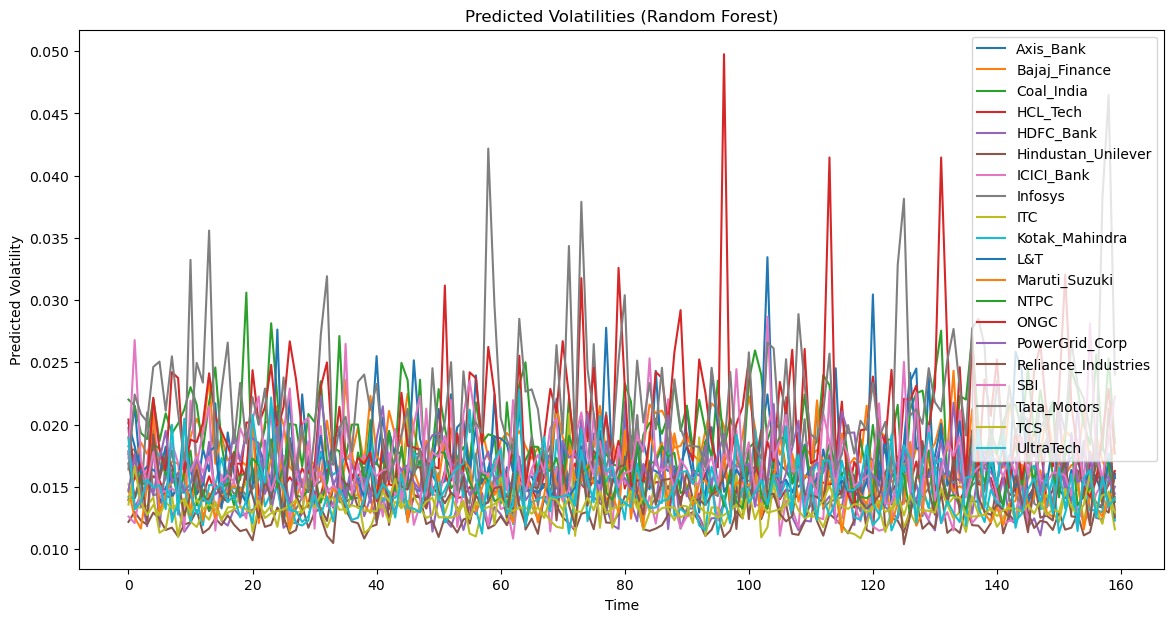

In [27]:
plt.figure(figsize=(14, 7))
for company in pred_vol_df.columns:
    plt.plot(pred_vol_df.index, pred_vol_df[company], label=company)
plt.title('Predicted Volatilities (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()

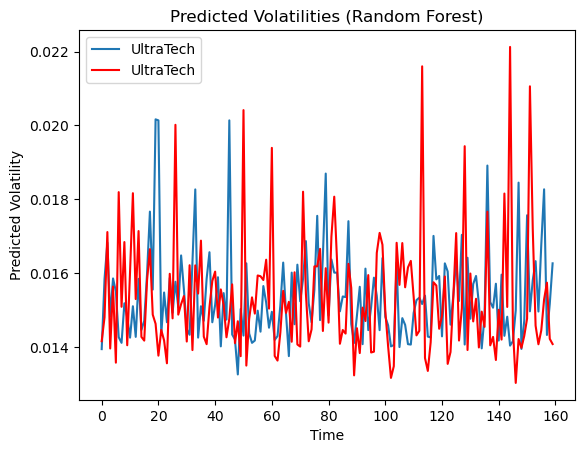

In [28]:
plt.plot(pred_vol_df.index, pred_vol_df['HCL_Tech'], label=company)
plt.plot(y_test_df.index, y_test_df['HCL_Tech'], label=company, color="red")
plt.title('Predicted Volatilities (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()

# Errors calculation

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming pred_vol_df is your DataFrame with predicted volatilities and y_test_df is the DataFrame with actual volatilities
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_df.values.flatten(), pred_vol_df.values.flatten())

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_df.values.flatten(), pred_vol_df.values.flatten())

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_df.values.flatten(), pred_vol_df.values.flatten(), squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.0031112083121374247
Mean Squared Error (MSE): 2.0848106522804257e-05
Root Mean Squared Error (RMSE): 0.004565972680908664


D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
# pred_vol_df.to_csv('D:/ResearchPaperRepository/Portfolio_optimization/Pred_randomForestVol.csv', sep = ",", index= False)

In [31]:
# pred_vol_df = pd.read_csv('D:/ResearchPaperRepository/Portfolio_optimization/Pred_randomForestVol.csv', index_col=0)

In [32]:
pred_vol_df

,Axis_Bank,Bajaj_Finance,Coal_India,HCL_Tech,HDFC_Bank,Hindustan_Unilever,ICICI_Bank,Infosys,ITC,Kotak_Mahindra,L&T,Maruti_Suzuki,NTPC,ONGC,PowerGrid_Corp,Reliance_Industries,SBI,Tata_Motors,TCS,UltraTech
0,0.017631,0.018997,0.022010,0.013943,0.019746,0.012181,0.012610,0.017843,0.015226,0.014192,0.020116,0.014796,0.018251,0.020404,0.014637,0.016885,0.017297,0.016395,0.013570,0.018910
1,0.021489,0.016857,0.021514,0.015846,0.013334,0.012981,0.012078,0.018021,0.013345,0.014064,0.018262,0.012528,0.017162,0.015622,0.017611,0.014116,0.026790,0.022419,0.016625,0.013175
2,0.015738,0.018564,0.019332,0.016827,0.014292,0.012292,0.014951,0.013887,0.013327,0.015226,0.016079,0.011647,0.015257,0.016934,0.013407,0.015982,0.017123,0.020852,0.013769,0.013809
3,0.016038,0.017634,0.018836,0.014825,0.011827,0.011965,0.016620,0.020975,0.013466,0.015720,0.016637,0.015018,0.015220,0.015308,0.015560,0.012276,0.015235,0.020226,0.012736,0.015595
4,0.019671,0.019278,0.022092,0.015857,0.018322,0.012921,0.021717,0.014280,0.014143,0.018228,0.016336,0.020842,0.018401,0.022155,0.014368,0.019223,0.017797,0.024632,0.013531,0.014942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.014471,0.016706,0.018400,0.016763,0.017853,0.011358,0.012825,0.014760,0.014772,0.013100,0.016384,0.014278,0.014925,0.014181,0.014996,0.011913,0.028123,0.019574,0.016056,0.016337
156,0.015890,0.019165,0.025610,0.018272,0.012498,0.013480,0.014448,0.013728,0.013125,0.013141,0.015827,0.013309,0.016743,0.015536,0.018578,0.018096,0.017410,0.016782,0.013237,0.012496
157,0.015502,0.017113,0.017969,0.014326,0.012377,0.013324,0.015283,0.013428,0.012027,0.012934,0.014179,0.012596,0.018286,0.019257,0.015285,0.013533,0.015674,0.038238,0.014332,0.015821
158,0.013828,0.015917,0.025322,0.015171,0.013741,0.012918,0.016370,0.015607,0.014630,0.017677,0.017043,0.014505,0.016596,0.022864,0.015855,0.021311,0.018780,0.046476,0.014459,0.013429


# Calculating Silhoutte score

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [34]:
pred_vol_df = pred_vol_df.T

In [35]:
import sklearn
import numpy as np
import pandas as pd

print("Scikit-learn version:", sklearn.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)


Scikit-learn version: 1.4.2
Numpy version: 1.26.4
Pandas version: 1.3.4


In [36]:
import threadpoolctl

# Print the threadpool information
print(threadpoolctl.threadpool_info())

[{'user_api': 'blas', 'internal_api': 'mkl', 'num_threads': 8, 'prefix': 'mkl_rt', 'filepath': 'D:\\Programs\\anaconda3\\Anaconda\\Library\\bin\\mkl_rt.2.dll', 'version': '2023.1-Product', 'threading_layer': 'intel'}, {'user_api': 'openmp', 'internal_api': 'openmp', 'num_threads': 8, 'prefix': 'libiomp', 'filepath': 'D:\\Programs\\anaconda3\\Anaconda\\Library\\bin\\libiomp5md.dll', 'version': None}, {'user_api': 'openmp', 'internal_api': 'openmp', 'num_threads': 8, 'prefix': 'vcomp', 'filepath': 'D:\\Programs\\anaconda3\\Anaconda\\vcomp140.dll', 'version': None}]


0      0
1      0
2      0
3      0
4      0
      ..
155    0
156    0
157    0
158    0
159    0
Length: 160, dtype: int64


D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have

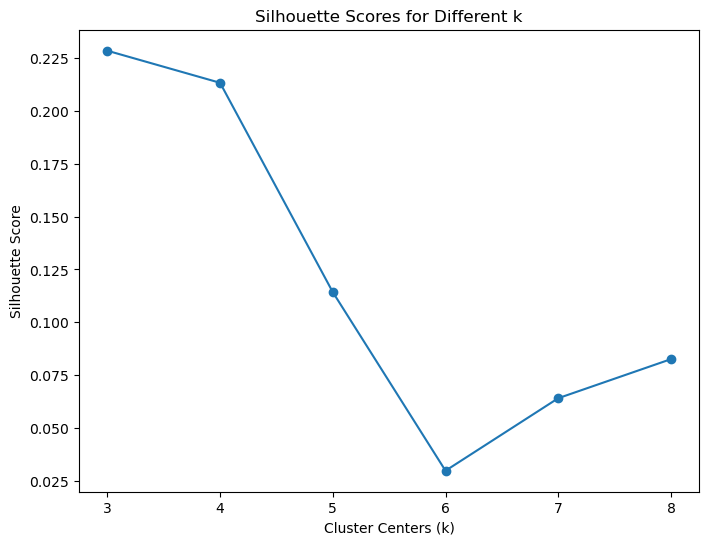

Optimal number of clusters: 3


In [37]:
# Sample pred_vol_df after predicting volatilities
# Replace this with your actual predicted volatilities DataFrame
# pred_vol_df = pd.DataFrame(...) 

def find_optimal_clusters(data, max_k):
    iters = range(3, max_k+1, 1)
    s_scores = []
    
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        kmeans.fit(data)
        s_scores.append(silhouette_score(data, kmeans.labels_))

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(iters, s_scores, marker='o')
    ax.set_xlabel('Cluster Centers (k)')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Scores for Different k')
    plt.show()

    optimal_k = iters[np.argmax(s_scores)]
    return optimal_k, s_scores


# Assuming pred_vol_df is your predicted volatilities DataFrame
print(pred_vol_df.isnull().sum())
optimal_k, s_scores = find_optimal_clusters(pred_vol_df, 8)
print(f"Optimal number of clusters: {optimal_k}")

# Clustering

In [38]:
from sklearn.cluster import KMeans

# Function to cluster companies based on predicted volatilities
def cluster_companies(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    data['Cluster'] = cluster_labels
    return data, cluster_labels

# Assuming pred_vol_df is your DataFrame with predicted volatilities for each company
# Cluster the companies

clustered_df, cluster_labels = cluster_companies(pred_vol_df, optimal_k)


D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
cluster_labels

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0])

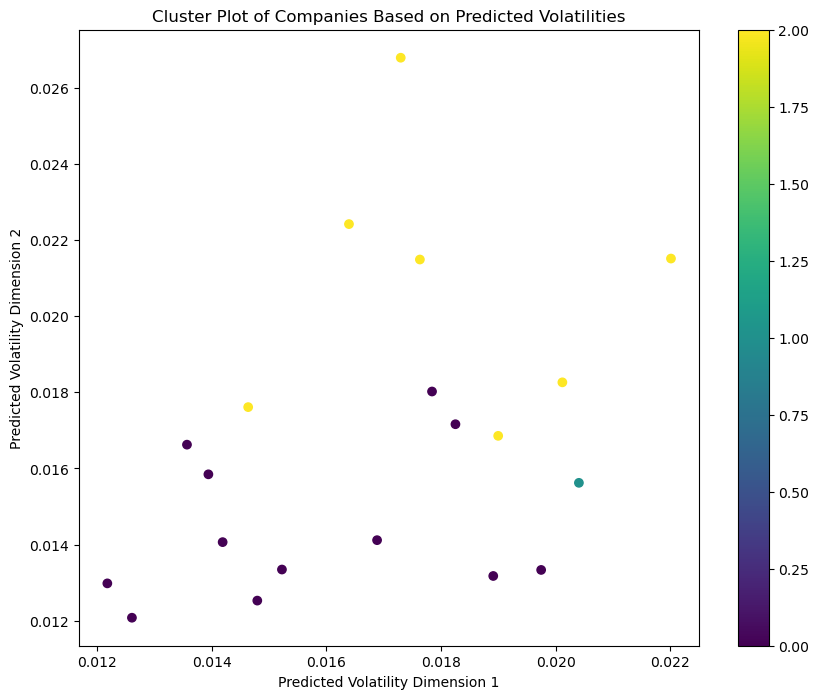

In [40]:
def plot_clusters(data, labels):
    plt.figure(figsize=(10, 8))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title('Cluster Plot of Companies Based on Predicted Volatilities')
    plt.xlabel('Predicted Volatility Dimension 1')
    plt.ylabel('Predicted Volatility Dimension 2')
    plt.colorbar()
    plt.show()

# Plot the clusters
plot_clusters(pred_vol_df.iloc[:, :-1], pred_vol_df['Cluster'])

In [41]:
pred_vol_df

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,Cluster
Axis_Bank,0.017631,0.021489,0.015738,0.016038,0.019671,0.013665,0.014928,0.015882,0.014550,0.014541,...,0.014089,0.016354,0.015107,0.017920,0.014471,0.015890,0.015502,0.013828,0.016049,2
Bajaj_Finance,0.018997,0.016857,0.018564,0.017634,0.019278,0.016976,0.016129,0.017034,0.016846,0.015533,...,0.015972,0.016737,0.016841,0.021265,0.016706,0.019165,0.017113,0.015917,0.018865,2
Coal_India,0.022010,0.021514,0.019332,0.018836,0.022092,0.018670,0.020899,0.019287,0.020085,0.021215,...,0.018858,0.024388,0.022822,0.019991,0.018400,0.025610,0.017969,0.025322,0.018489,2
HCL_Tech,0.013943,0.015846,0.016827,0.014825,0.015857,0.015508,0.014266,0.014113,0.015184,0.014798,...,0.014967,0.015811,0.016326,0.014961,0.016763,0.018272,0.014326,0.015171,0.016267,0
HDFC_Bank,0.019746,0.013334,0.014292,0.011827,0.018322,0.011763,0.017020,0.012698,0.013368,0.011384,...,0.015441,0.013696,0.021807,0.014067,0.017853,0.012498,0.012377,0.013741,0.015009,0
Hindustan_Unilever,0.012181,0.012981,0.012292,0.011965,0.012921,0.012422,0.011529,0.011723,0.010999,0.011971,...,0.011555,0.011711,0.012812,0.011099,0.011358,0.013480,0.013324,0.012918,0.015964,0
ICICI_Bank,0.012610,0.012078,0.014951,0.016620,0.021717,0.014314,0.013838,0.018525,0.016906,0.011509,...,0.014786,0.014891,0.013209,0.012187,0.012825,0.014448,0.015283,0.016370,0.013132,0
Infosys,0.017843,0.018021,0.013887,0.020975,0.014280,0.014553,0.015690,0.017909,0.014573,0.014612,...,0.017530,0.018478,0.014732,0.018706,0.014760,0.013728,0.013428,0.015607,0.015741,0
ITC,0.015226,0.013345,0.013327,0.013466,0.014143,0.011306,0.011624,0.014323,0.010990,0.013876,...,0.014623,0.012940,0.015240,0.012189,0.014772,0.013125,0.012027,0.014630,0.011593,0
Kotak_Mahindra,0.014192,0.014064,0.015226,0.015720,0.018228,0.017445,0.017798,0.012173,0.013833,0.015150,...,0.012893,0.014906,0.011448,0.016298,0.013100,0.013141,0.012934,0.017677,0.012281,0


In [42]:
df = pred_vol_df.drop(['Cluster'], axis=1)
df = df.T
mean_vol_dict = df.mean().to_dict()
print(mean_vol_dict)
num_clusters= optimal_k-1

{'Axis_Bank': 0.01666411970434384, 'Bajaj_Finance': 0.018307858063915234, 'Coal_India': 0.01974458985167521, 'HCL_Tech': 0.015378812310748599, 'HDFC_Bank': 0.014084877759435696, 'Hindustan_Unilever': 0.012666653567352724, 'ICICI_Bank': 0.01516184861802937, 'Infosys': 0.015722918690876518, 'ITC': 0.013437530895469873, 'Kotak_Mahindra': 0.014597928109065303, 'L&T': 0.017104108354385677, 'Maruti_Suzuki': 0.015177546831636368, 'NTPC': 0.016024061591498818, 'ONGC': 0.02045269193672882, 'PowerGrid_Corp': 0.016555508587326278, 'Reliance_Industries': 0.014743849611282217, 'SBI': 0.017301658117071933, 'Tata_Motors': 0.021873071690581693, 'TCS': 0.013410634703635283, 'UltraTech': 0.015126918357267257}


In [43]:
for i, (company, volatility) in enumerate(mean_vol_dict.items()):
    cluster_label = cluster_labels[i]
    print(f"{company}: Forecasted Volatility={volatility}, Cluster={cluster_label}")

# Print the companies belonging to each cluster
for cluster in range(num_clusters+1):
    companies_in_cluster = [company for i, (company, label) in enumerate(mean_vol_dict.items()) if cluster_labels[i] == cluster]
    print(f"Companies in Cluster {cluster}: {companies_in_cluster}")

Axis_Bank: Forecasted Volatility=0.01666411970434384, Cluster=2
Bajaj_Finance: Forecasted Volatility=0.018307858063915234, Cluster=2
Coal_India: Forecasted Volatility=0.01974458985167521, Cluster=2
HCL_Tech: Forecasted Volatility=0.015378812310748599, Cluster=0
HDFC_Bank: Forecasted Volatility=0.014084877759435696, Cluster=0
Hindustan_Unilever: Forecasted Volatility=0.012666653567352724, Cluster=0
ICICI_Bank: Forecasted Volatility=0.01516184861802937, Cluster=0
Infosys: Forecasted Volatility=0.015722918690876518, Cluster=0
ITC: Forecasted Volatility=0.013437530895469873, Cluster=0
Kotak_Mahindra: Forecasted Volatility=0.014597928109065303, Cluster=0
L&T: Forecasted Volatility=0.017104108354385677, Cluster=2
Maruti_Suzuki: Forecasted Volatility=0.015177546831636368, Cluster=0
NTPC: Forecasted Volatility=0.016024061591498818, Cluster=0
ONGC: Forecasted Volatility=0.02045269193672882, Cluster=1
PowerGrid_Corp: Forecasted Volatility=0.016555508587326278, Cluster=2
Reliance_Industries: Fore

clustered_companies {0: ['HCL_Tech', 'HDFC_Bank', 'Hindustan_Unilever', 'ICICI_Bank', 'Infosys', 'ITC', 'Kotak_Mahindra', 'Maruti_Suzuki', 'NTPC', 'Reliance_Industries', 'TCS', 'UltraTech'], 1: ['ONGC'], 2: ['Axis_Bank', 'Bajaj_Finance', 'Coal_India', 'L&T', 'PowerGrid_Corp', 'SBI', 'Tata_Motors']}


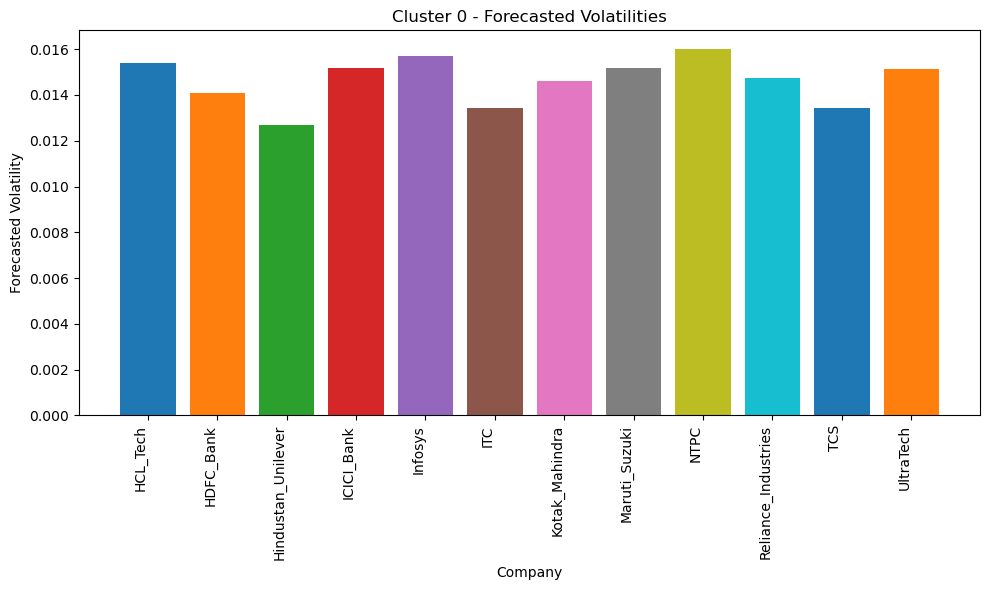

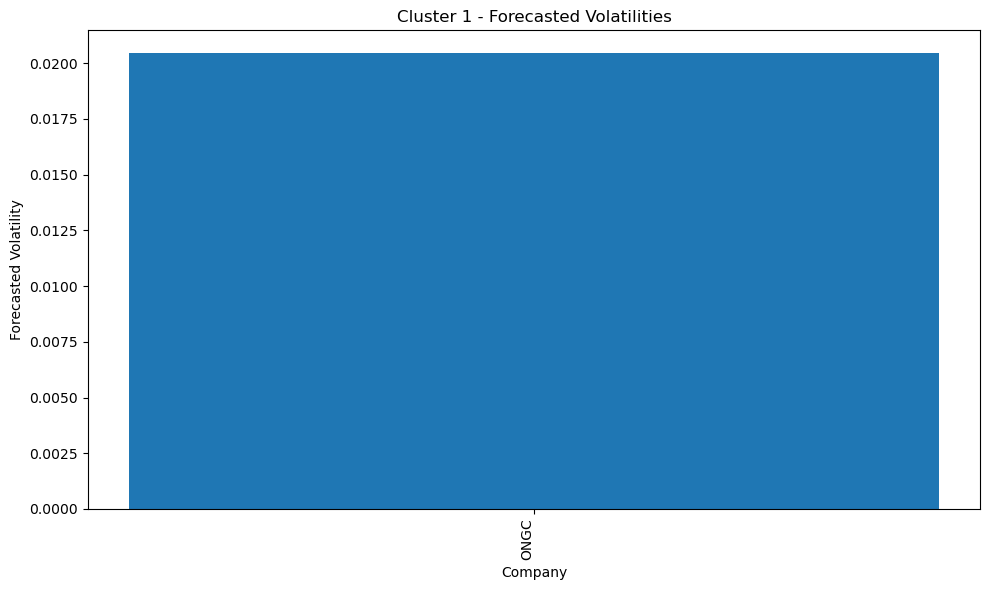

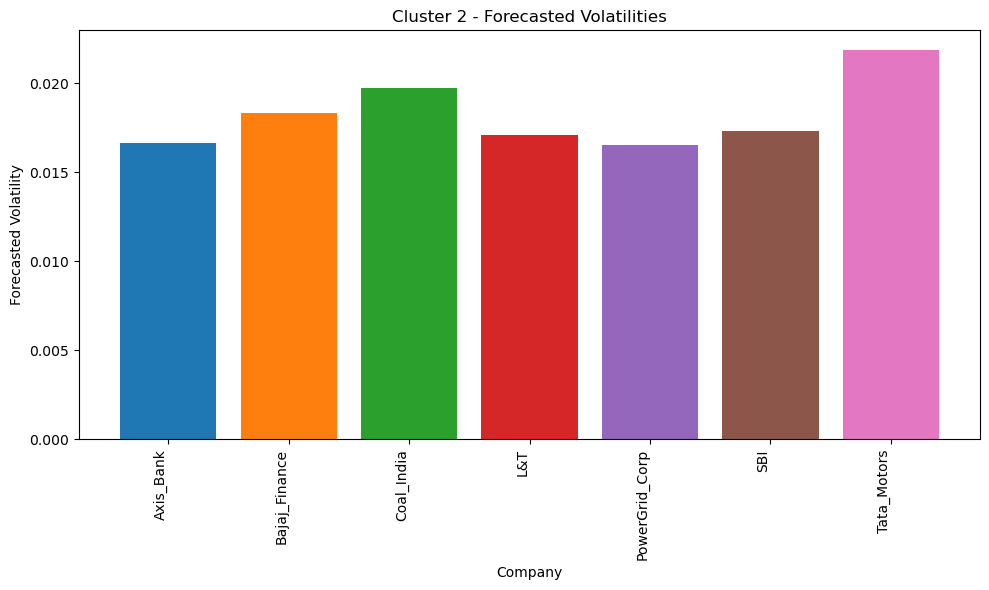

In [44]:
import matplotlib.pyplot as plt

# Create a dictionary to store companies in each cluster
clustered_companies = {cluster: [] for cluster in range(num_clusters+1)}
for i, (company, volatility) in enumerate(mean_vol_dict.items()):
    cluster_label = cluster_labels[i]
    clustered_companies[cluster_label].append(company)

print("clustered_companies",clustered_companies)
# Plot forecasted volatilities for each cluster
for cluster, companies in clustered_companies.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Cluster {cluster} - Forecasted Volatilities')
    plt.xlabel('Company')
    plt.ylabel('Forecasted Volatility')
    for company in companies:
        plt.bar(company, mean_vol_dict[company])
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [45]:
# Initialize a dictionary to store companies in each cluster
cluster_data = {cluster: {} for cluster in range(num_clusters+1)}

# Populate the dictionary with company names and volatilities
for i, (company, volatility) in enumerate(mean_vol_dict.items()):
    cluster_label = cluster_labels[i]
    cluster_data[cluster_label][company] = volatility

# Access data for a specific cluster (e.g., Cluster 0)
cluster_0_data = cluster_data[0]
cluster_1_data = cluster_data[1]
cluster_2_data = cluster_data[2]

print(cluster_0_data)
print(cluster_1_data)
print(cluster_2_data)

{'HCL_Tech': 0.015378812310748599, 'HDFC_Bank': 0.014084877759435696, 'Hindustan_Unilever': 0.012666653567352724, 'ICICI_Bank': 0.01516184861802937, 'Infosys': 0.015722918690876518, 'ITC': 0.013437530895469873, 'Kotak_Mahindra': 0.014597928109065303, 'Maruti_Suzuki': 0.015177546831636368, 'NTPC': 0.016024061591498818, 'Reliance_Industries': 0.014743849611282217, 'TCS': 0.013410634703635283, 'UltraTech': 0.015126918357267257}
{'ONGC': 0.02045269193672882}
{'Axis_Bank': 0.01666411970434384, 'Bajaj_Finance': 0.018307858063915234, 'Coal_India': 0.01974458985167521, 'L&T': 0.017104108354385677, 'PowerGrid_Corp': 0.016555508587326278, 'SBI': 0.017301658117071933, 'Tata_Motors': 0.021873071690581693}


In [46]:
# Assuming a risk-free rate
risk_free_rate = 0.05  # 5% annual risk-free rate

# Assuming a market risk premium
market_risk_premium = 0.08  # 8% annual market risk premium

# Calculating expected returns using CAPM
def cal_expected_returns(cluster_0_data):
    expected_returns = {}
    for stock, volatility in cluster_0_data.items():
        beta = 1.0  # Assuming beta of 1 for simplicity
        expected_return = risk_free_rate + beta * market_risk_premium * volatility
        expected_returns[stock] = expected_return
        
        exp_ret={}
    # Display expected returns
    for stock, expected_return in expected_returns.items():
        exp_ret[stock]=expected_return
        print(f"{stock}: {expected_return}")
        
    return exp_ret

In [47]:
expected_0_returns = cal_expected_returns(cluster_0_data)
expected_1_returns = cal_expected_returns(cluster_1_data)
expected_2_returns = cal_expected_returns(cluster_2_data)

HCL_Tech: 0.05123030498485989
HDFC_Bank: 0.05112679022075486
Hindustan_Unilever: 0.05101333228538822
ICICI_Bank: 0.051212947889442355
Infosys: 0.051257833495270126
ITC: 0.05107500247163759
Kotak_Mahindra: 0.05116783424872523
Maruti_Suzuki: 0.05121420374653091
NTPC: 0.05128192492731991
Reliance_Industries: 0.05117950796890258
TCS: 0.051072850776290826
UltraTech: 0.05121015346858138
ONGC: 0.05163621535493831
Axis_Bank: 0.05133312957634751
Bajaj_Finance: 0.051464628645113225
Coal_India: 0.05157956718813402
L&T: 0.05136832866835086
PowerGrid_Corp: 0.051324440686986106
SBI: 0.051384132649365755
Tata_Motors: 0.05174984573524654


In [48]:
import cvxpy as cp
def mvo_function(final_cluster):
    
    num_stocks = len(final_cluster)

    print(num_stocks)
    weights = cp.Variable(num_stocks)
    print(weights)
    portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(final_cluster.values()))))
    print(portfolio_volatility)

    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Create optimization problem
    problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
    print(problem)

    problem.solve(qcp=True)
    
    
    optimized_weights = weights.value
    final_optimized_weight={}
    for i, stock in enumerate(final_cluster.keys()):
        final_optimized_weight[stock] = optimized_weights[i]
        print(f"{stock}: {optimized_weights[i]}")
        # Calculate portfolio risk contribution
    portfolio_risk_contribution = {stock: optimized_weights[i] * final_cluster[stock] for i, stock in enumerate(final_cluster.keys())}
    print("\n")
    # Display portfolio composition
    print("Portfolio Composition:")
    pc={}
    for stock, weight in zip(final_cluster.keys(), optimized_weights):
        pc[stock]=weight
        print(f"{stock}: {weight * 100:.2f}%")
    max_comp = max(zip(pc.values(), pc.keys()))[1]
    vol = final_cluster[max_comp]

    # Display portfolio risk contribution
   
    print("\nPortfolio Risk Contribution:")
    for stock, risk_contribution in portfolio_risk_contribution.items():
        print(f"{stock}: {risk_contribution * 100:.2f}%")

    # Calculate and display total portfolio risk
    portfolio_risk = sum(portfolio_risk_contribution.values())
    print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")
    
    
    return max_comp, vol

In [50]:
clusters = [cluster_0_data, cluster_1_data, cluster_2_data]

In [51]:
clusters

[{'HCL_Tech': 0.015378812310748599,
  'HDFC_Bank': 0.014084877759435696,
  'Hindustan_Unilever': 0.012666653567352724,
  'ICICI_Bank': 0.01516184861802937,
  'Infosys': 0.015722918690876518,
  'ITC': 0.013437530895469873,
  'Kotak_Mahindra': 0.014597928109065303,
  'Maruti_Suzuki': 0.015177546831636368,
  'NTPC': 0.016024061591498818,
  'Reliance_Industries': 0.014743849611282217,
  'TCS': 0.013410634703635283,
  'UltraTech': 0.015126918357267257},
 {'ONGC': 0.02045269193672882},
 {'Axis_Bank': 0.01666411970434384,
  'Bajaj_Finance': 0.018307858063915234,
  'Coal_India': 0.01974458985167521,
  'L&T': 0.017104108354385677,
  'PowerGrid_Corp': 0.016555508587326278,
  'SBI': 0.017301658117071933,
  'Tata_Motors': 0.021873071690581693}]

In [52]:
# Function to process each cluster
f_cluster={}
def process_clusters(clusters):
    for i, cluster in enumerate(clusters):
        print(f"Processing Cluster {i}...")
        max_comp, vol = mvo_function(cluster)
        f_cluster[max_comp]=vol
        print("\n")

# Call the function
process_clusters(clusters)

Processing Cluster 0...
12
var1
power(QuadForm(var1, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
minimize power(QuadForm(var1, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
subject to Sum(var1, None, False) == 1.0
           0.0 <= var1
HCL_Tech: 0.08278738823510479
HDFC_Bank: 0.08369643213558814
Hindustan_Unilever: 0.08482326381983098
ICICI_Bank: 0.08293291280240322
Infosys: 0.08256182342210107
ITC: 0.08419196388286461
Kotak_Mahindra: 0.08332380636493254
Maruti_Suzuki: 0.08292229540003453
NTPC: 0.08236947296618845
Reliance_Industries: 0.0832208468140898
TCS: 0.08421320651231347
UltraTech: 0.08295658764454854


Portfolio Composition:
HCL_Tech: 8.28%
HDFC_Bank: 8.37%
Hindustan_Unilever: 8.48%
ICICI_Bank: 8.29%
Infosys: 8.26%
ITC: 8.42%
Kotak_Mahindra: 8.33%
Maruti_Suzuki: 8.29%
NTPC: 8.24%
Reliance_Industries: 8.32%
TCS: 8.42%
UltraTech:

D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

ONGC: 1.0000000000000004


Portfolio Composition:
ONGC: 100.00%

Portfolio Risk Contribution:
ONGC: 2.05%

Total Portfolio Risk: 2.05%


Processing Cluster 2...
7
var1830
power(QuadForm(var1830, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.02 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
minimize power(QuadForm(var1830, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.02 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
subject to Sum(var1830, None, False) == 1.0
           0.0 <= var1830
Axis_Bank: 0.1444990645767616
Bajaj_Finance: 0.1426561675626743
Coal_India: 0.1412029416348853
L&T: 0.14398470622010492
PowerGrid_Corp: 0.144628593457995
SBI: 0.1437589960647456
Tata_Motors: 0.13926953048283386


Portfolio Composition:
Axis_Bank: 14.45%
Bajaj_Finance: 14.27%
Coal_India: 14.12%
L&T: 14.40%
PowerGrid_Corp: 14.46%
SBI: 14.38%
Tata_Motors: 13.93%

Portfolio Risk Contribution:
Axis_Bank: 0.24%
Bajaj_Finance: 0.26%
Coal_India: 0.28%
L&T: 0.25%
P

D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

# Final Portfolio

In [53]:
f_cluster

{'Hindustan_Unilever': 0.012666653567352724,
 'ONGC': 0.02045269193672882,
 'PowerGrid_Corp': 0.016555508587326278}

In [54]:
expected_returns = cal_expected_returns(f_cluster)

Hindustan_Unilever: 0.05101333228538822
ONGC: 0.05163621535493831
PowerGrid_Corp: 0.051324440686986106


In [55]:
final_cluster = f_cluster

In [56]:
num_stocks = len(final_cluster)

print(num_stocks)
weights = cp.Variable(num_stocks)
print(weights)
portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(final_cluster.values()))))
print(portfolio_volatility)

constraints = [cp.sum(weights) == 1, weights >= 0]

# Create optimization problem
problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
print(problem)

problem.solve(qcp=True)


optimized_weights = weights.value
final_optimized_weight={}
for i, stock in enumerate(final_cluster.keys()):
    final_optimized_weight[stock] = optimized_weights[i]
    print(f"{stock}: {optimized_weights[i]}")
    # Calculate portfolio risk contribution
portfolio_risk_contribution = {stock: optimized_weights[i] * final_cluster[stock] for i, stock in enumerate(final_cluster.keys())}
print("\n")
# Display portfolio composition
print("Portfolio Composition:")
for stock, weight in zip(final_cluster.keys(), optimized_weights):
    print(f"{stock}: {weight * 100:.2f}%")

# Display portfolio risk contribution

print("\nPortfolio Risk Contribution:")
for stock, risk_contribution in portfolio_risk_contribution.items():
    print(f"{stock}: {risk_contribution * 100:.2f}%")

# Calculate and display total portfolio risk
portfolio_risk = sum(portfolio_risk_contribution.values())
print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")

3
var2768
power(QuadForm(var2768, [[0.01 0.00 0.00]
 [0.00 0.02 0.00]
 [0.00 0.00 0.02]]), 0.5)
minimize power(QuadForm(var2768, [[0.01 0.00 0.00]
 [0.00 0.02 0.00]
 [0.00 0.00 0.02]]), 0.5)
subject to Sum(var2768, None, False) == 1.0
           0.0 <= var2768
Hindustan_Unilever: 0.34864464061931333
ONGC: 0.3192613645677427
PowerGrid_Corp: 0.33209399481294427


Portfolio Composition:
Hindustan_Unilever: 34.86%
ONGC: 31.93%
PowerGrid_Corp: 33.21%

Portfolio Risk Contribution:
Hindustan_Unilever: 0.44%
ONGC: 0.65%
PowerGrid_Corp: 0.55%

Total Portfolio Risk: 1.64%


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

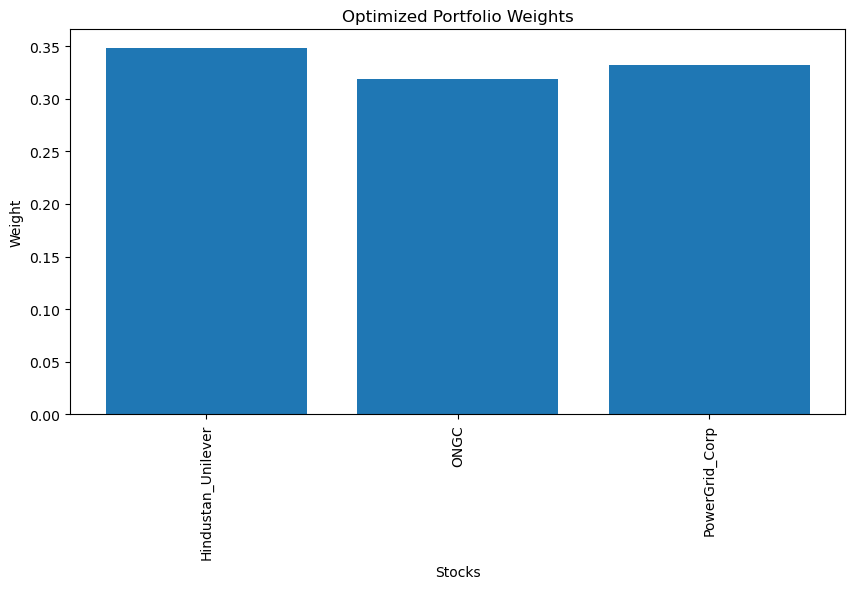

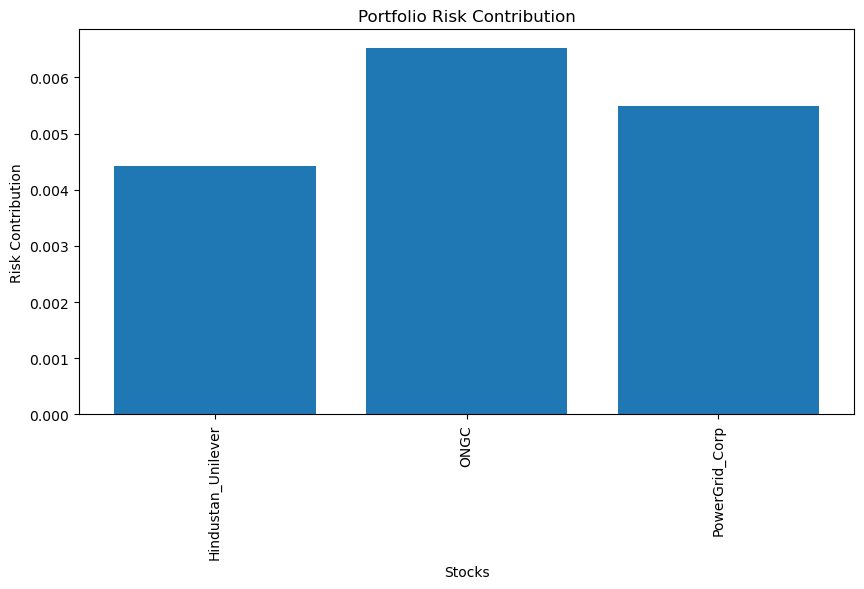

In [57]:
import matplotlib.pyplot as plt

# Plotting optimized weights
plt.figure(figsize=(10, 5))
plt.bar(final_cluster.keys(), optimized_weights)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

# Plotting portfolio risk contribution
plt.figure(figsize=(10, 5))
plt.bar(portfolio_risk_contribution.keys(), portfolio_risk_contribution.values())
plt.title('Portfolio Risk Contribution')
plt.xlabel('Stocks')
plt.ylabel('Risk Contribution')
plt.xticks(rotation=90)
plt.show()

In [58]:
final_optimized_weight

{'Hindustan_Unilever': 0.34864464061931333,
 'ONGC': 0.3192613645677427,
 'PowerGrid_Corp': 0.33209399481294427}

In [59]:
print(expected_returns)

{'Hindustan_Unilever': 0.05101333228538822, 'ONGC': 0.05163621535493831, 'PowerGrid_Corp': 0.051324440686986106}


In [60]:
risk_free_rate = 0.05  # 5% annual risk-free rate

# Calculate portfolio expected return
portfolio_expected_return = sum(final_optimized_weight[stock] * expected_returns[stock] for stock in final_optimized_weight)

# Calculate portfolio volatility (standard deviation)
# Assuming you have calculated portfolio volatility using covariance matrix or GARCH model
portfolio_volatility =0.01 # Replace with actual portfolio volatility

# Calculate Sharpe ratio
sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility

print("Portfolio Expected Return:", portfolio_expected_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Portfolio Expected Return: 0.05131551201604545
Portfolio Volatility: 0.01
Sharpe Ratio: 0.13155120160454475


# Take mean and make clusters

In [61]:
pred_vol_df = pred_vol_df.drop(['Cluster'], axis=1)

In [62]:
pred_vol_df = pred_vol_df.T

In [63]:
import pandas as pd

mean_vol_dict = pred_vol_df.mean().to_dict()

print(mean_vol_dict)


{'Axis_Bank': 0.01666411970434384, 'Bajaj_Finance': 0.018307858063915234, 'Coal_India': 0.01974458985167521, 'HCL_Tech': 0.015378812310748599, 'HDFC_Bank': 0.014084877759435696, 'Hindustan_Unilever': 0.012666653567352724, 'ICICI_Bank': 0.01516184861802937, 'Infosys': 0.015722918690876518, 'ITC': 0.013437530895469873, 'Kotak_Mahindra': 0.014597928109065303, 'L&T': 0.017104108354385677, 'Maruti_Suzuki': 0.015177546831636368, 'NTPC': 0.016024061591498818, 'ONGC': 0.02045269193672882, 'PowerGrid_Corp': 0.016555508587326278, 'Reliance_Industries': 0.014743849611282217, 'SBI': 0.017301658117071933, 'Tata_Motors': 0.021873071690581693, 'TCS': 0.013410634703635283, 'UltraTech': 0.015126918357267257}


In [64]:
from sklearn.cluster import KMeans
forecasted_volatilities = np.array(list(mean_vol_dict.values())).reshape(-1, 1)
# num_clusters = 3  # Define the number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(forecasted_volatilities)
min_k = 3
max_k = 10

silhouette_scores = []

# Compute silhouette score for each k
for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(forecasted_volatilities)
    silhouette_avg = silhouette_score(forecasted_volatilities, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + min_k
print("Optimal number of clusters (k):", optimal_k)
print(silhouette_scores)

Optimal number of clusters (k): 4
[0.5366955615086949, 0.5773663146031673, 0.5021725356062396, 0.5124859090422491, 0.4767778701280513, 0.49620571078497544, 0.5382100252705012, 0.5306467602820419]


D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have

In [65]:
forecasted_volatilities

array([[0.01666412],
       [0.01830786],
       [0.01974459],
       [0.01537881],
       [0.01408488],
       [0.01266665],
       [0.01516185],
       [0.01572292],
       [0.01343753],
       [0.01459793],
       [0.01710411],
       [0.01517755],
       [0.01602406],
       [0.02045269],
       [0.01655551],
       [0.01474385],
       [0.01730166],
       [0.02187307],
       [0.01341063],
       [0.01512692]])

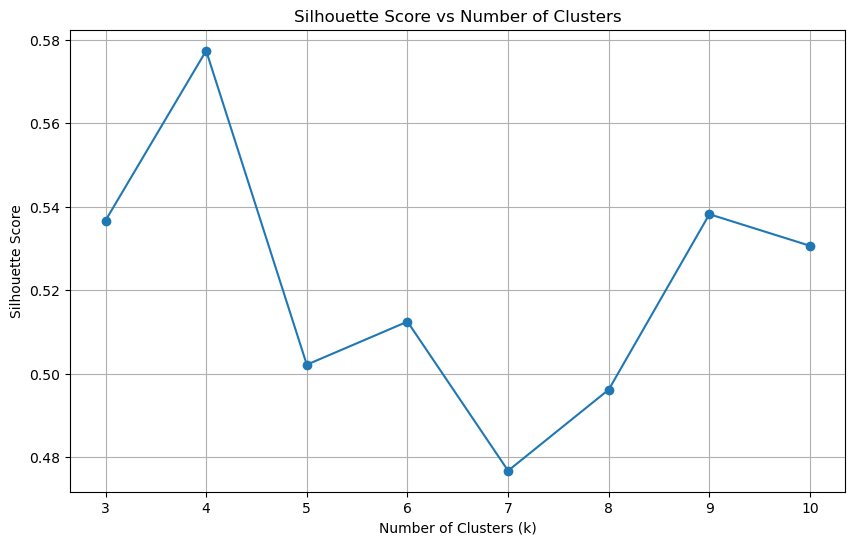

In [66]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_k, max_k + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [67]:
forecasted_volatilities = np.array(list(mean_vol_dict.values())).reshape(-1, 1)
num_clusters = optimal_k  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(forecasted_volatilities)

# Print the cluster labels for each company
print("Clustering Results:")
for i, (company, volatility) in enumerate(mean_vol_dict.items()):
    cluster_label = cluster_labels[i]
    print(f"{company}: Forecasted Volatility={volatility}, Cluster={cluster_label}")

# Print the companies belonging to each cluster
for cluster in range(num_clusters):
    companies_in_cluster = [company for i, (company, label) in enumerate(mean_vol_dict.items()) if cluster_labels[i] == cluster]
    print(f"Companies in Cluster {cluster}: {companies_in_cluster}")

Clustering Results:
Axis_Bank: Forecasted Volatility=0.01666411970434384, Cluster=2
Bajaj_Finance: Forecasted Volatility=0.018307858063915234, Cluster=2
Coal_India: Forecasted Volatility=0.01974458985167521, Cluster=1
HCL_Tech: Forecasted Volatility=0.015378812310748599, Cluster=0
HDFC_Bank: Forecasted Volatility=0.014084877759435696, Cluster=3
Hindustan_Unilever: Forecasted Volatility=0.012666653567352724, Cluster=3
ICICI_Bank: Forecasted Volatility=0.01516184861802937, Cluster=0
Infosys: Forecasted Volatility=0.015722918690876518, Cluster=0
ITC: Forecasted Volatility=0.013437530895469873, Cluster=3
Kotak_Mahindra: Forecasted Volatility=0.014597928109065303, Cluster=0
L&T: Forecasted Volatility=0.017104108354385677, Cluster=2
Maruti_Suzuki: Forecasted Volatility=0.015177546831636368, Cluster=0
NTPC: Forecasted Volatility=0.016024061591498818, Cluster=0
ONGC: Forecasted Volatility=0.02045269193672882, Cluster=1
PowerGrid_Corp: Forecasted Volatility=0.016555508587326278, Cluster=2
Relia

D:\Programs\anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Plots for clusters

clustered_companies {0: ['HCL_Tech', 'ICICI_Bank', 'Infosys', 'Kotak_Mahindra', 'Maruti_Suzuki', 'NTPC', 'Reliance_Industries', 'UltraTech'], 1: ['Coal_India', 'ONGC', 'Tata_Motors'], 2: ['Axis_Bank', 'Bajaj_Finance', 'L&T', 'PowerGrid_Corp', 'SBI'], 3: ['HDFC_Bank', 'Hindustan_Unilever', 'ITC', 'TCS']}


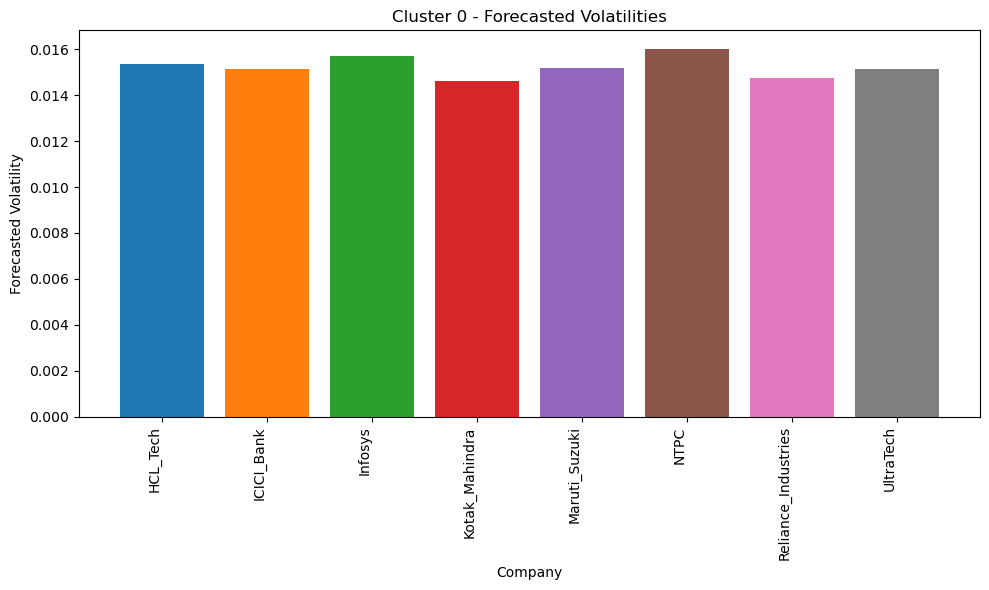

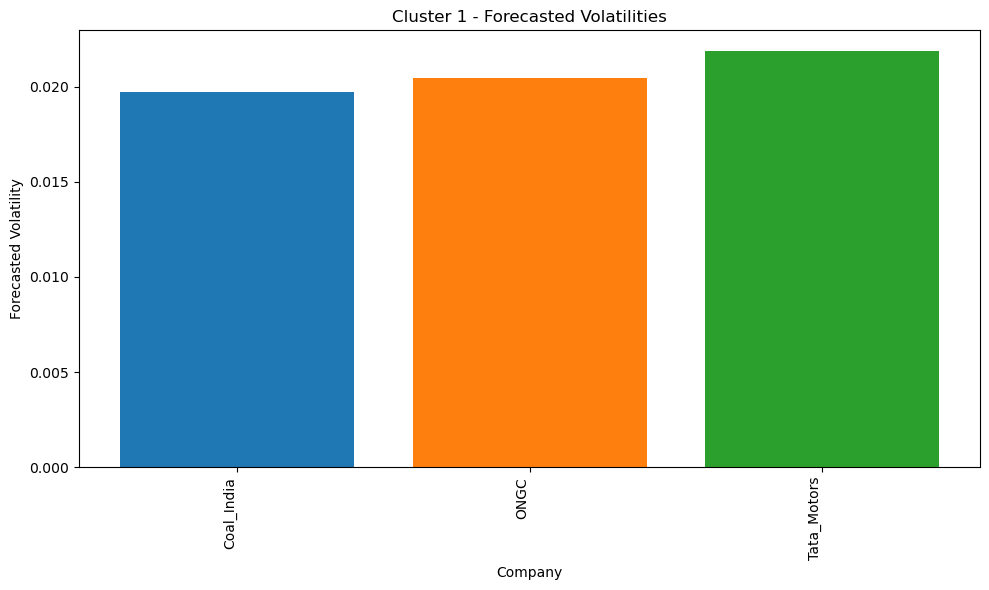

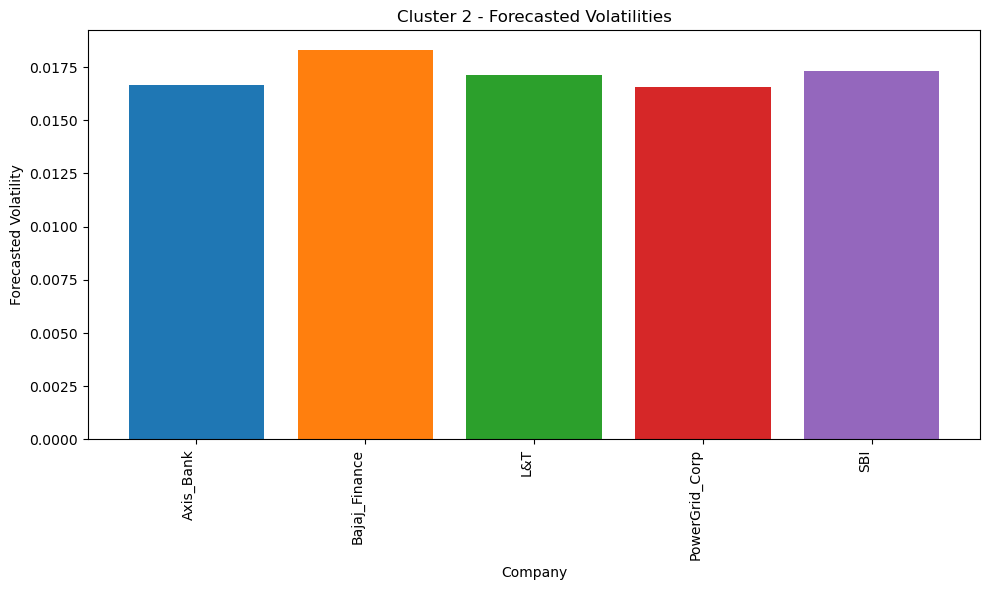

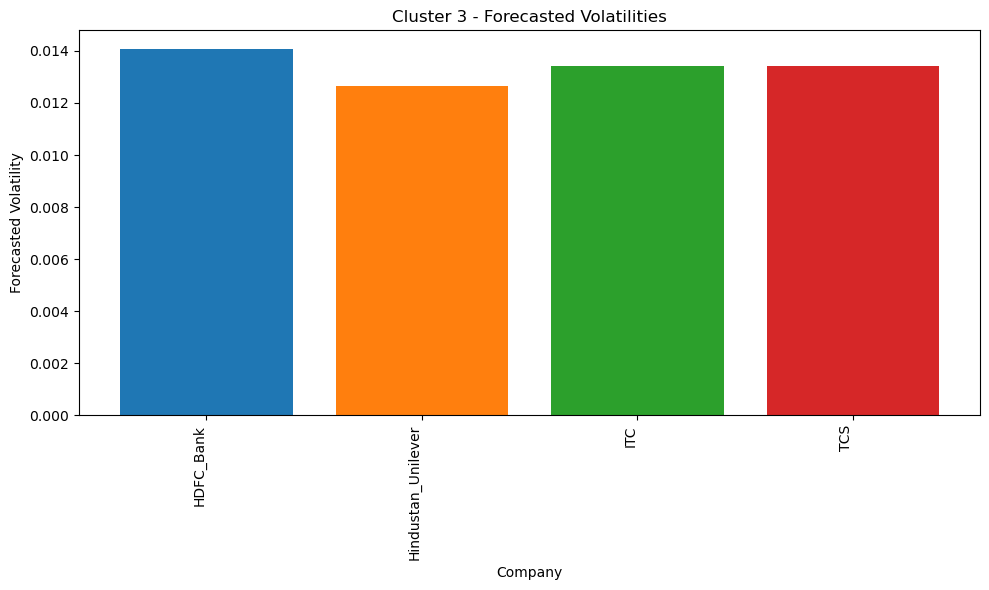

In [68]:
import matplotlib.pyplot as plt

# Create a dictionary to store companies in each cluster
clustered_companies = {cluster: [] for cluster in range(num_clusters)}
for i, (company, volatility) in enumerate(mean_vol_dict.items()):
    cluster_label = cluster_labels[i]
    clustered_companies[cluster_label].append(company)

print("clustered_companies",clustered_companies)
# Plot forecasted volatilities for each cluster
for cluster, companies in clustered_companies.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Cluster {cluster} - Forecasted Volatilities')
    plt.xlabel('Company')
    plt.ylabel('Forecasted Volatility')
    for company in companies:
        plt.bar(company, mean_vol_dict[company])
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

# Spliting of data into clusters

In [69]:
# Initialize a dictionary to store companies in each cluster
cluster_data = {cluster: {} for cluster in range(num_clusters)}

# Populate the dictionary with company names and volatilities
for i, (company, volatility) in enumerate(mean_vol_dict.items()):
    cluster_label = cluster_labels[i]
    cluster_data[cluster_label][company] = volatility

# # Print cluster data
# for cluster, companies in cluster_data.items():
#     print(f"Cluster {cluster}:")
#     for company, volatility in companies.items():
#         print(f"{company}: Forecasted Volatility={volatility}")

# Access data for a specific cluster (e.g., Cluster 0)
cluster_0_data = cluster_data[0]
cluster_1_data = cluster_data[1]
cluster_2_data = cluster_data[2]
cluster_3_data = cluster_data[3]

print(cluster_0_data)
print(cluster_1_data)
print(cluster_2_data)
print(cluster_3_data)

{'HCL_Tech': 0.015378812310748599, 'ICICI_Bank': 0.01516184861802937, 'Infosys': 0.015722918690876518, 'Kotak_Mahindra': 0.014597928109065303, 'Maruti_Suzuki': 0.015177546831636368, 'NTPC': 0.016024061591498818, 'Reliance_Industries': 0.014743849611282217, 'UltraTech': 0.015126918357267257}
{'Coal_India': 0.01974458985167521, 'ONGC': 0.02045269193672882, 'Tata_Motors': 0.021873071690581693}
{'Axis_Bank': 0.01666411970434384, 'Bajaj_Finance': 0.018307858063915234, 'L&T': 0.017104108354385677, 'PowerGrid_Corp': 0.016555508587326278, 'SBI': 0.017301658117071933}
{'HDFC_Bank': 0.014084877759435696, 'Hindustan_Unilever': 0.012666653567352724, 'ITC': 0.013437530895469873, 'TCS': 0.013410634703635283}


# Calculating Expected Returns

In [70]:
# Assuming a risk-free rate
risk_free_rate = 0.05  # 5% annual risk-free rate

# Assuming a market risk premium
market_risk_premium = 0.08  # 8% annual market risk premium

# Calculating expected returns using CAPM
def cal_expected_returns(cluster_0_data):
    expected_returns = {}
    for stock, volatility in cluster_0_data.items():
        beta = 1.0  # Assuming beta of 1 for simplicity
        expected_return = risk_free_rate + beta * market_risk_premium * volatility
        expected_returns[stock] = expected_return
        
        exp_ret={}
    # Display expected returns
    for stock, expected_return in expected_returns.items():
        exp_ret[stock]=expected_return
        print(f"{stock}: {expected_return}")
        
    return exp_ret

In [71]:
expected_0_returns = cal_expected_returns(cluster_0_data)
expected_1_returns = cal_expected_returns(cluster_1_data)
expected_2_returns = cal_expected_returns(cluster_2_data)
expected_3_returns = cal_expected_returns(cluster_3_data)

HCL_Tech: 0.05123030498485989
ICICI_Bank: 0.051212947889442355
Infosys: 0.051257833495270126
Kotak_Mahindra: 0.05116783424872523
Maruti_Suzuki: 0.05121420374653091
NTPC: 0.05128192492731991
Reliance_Industries: 0.05117950796890258
UltraTech: 0.05121015346858138
Coal_India: 0.05157956718813402
ONGC: 0.05163621535493831
Tata_Motors: 0.05174984573524654
Axis_Bank: 0.05133312957634751
Bajaj_Finance: 0.051464628645113225
L&T: 0.05136832866835086
PowerGrid_Corp: 0.051324440686986106
SBI: 0.051384132649365755
HDFC_Bank: 0.05112679022075486
Hindustan_Unilever: 0.05101333228538822
ITC: 0.05107500247163759
TCS: 0.051072850776290826


# Calculating Weights

In [72]:
import numpy as np
import cvxpy as cp


In [73]:
cluster_3_data 

{'HDFC_Bank': 0.014084877759435696,
 'Hindustan_Unilever': 0.012666653567352724,
 'ITC': 0.013437530895469873,
 'TCS': 0.013410634703635283}

In [74]:
def mvo_funtion(final_cluster):
    
    num_stocks = len(final_cluster)

    print(num_stocks)
    weights = cp.Variable(num_stocks)
    print(weights)
    portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(final_cluster.values()))))
    print(portfolio_volatility)

    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Create optimization problem
    problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
    print(problem)

    problem.solve(qcp=True)
    
    
    optimized_weights = weights.value
    final_optimized_weight={}
    for i, stock in enumerate(final_cluster.keys()):
        final_optimized_weight[stock] = optimized_weights[i]
        print(f"{stock}: {optimized_weights[i]}")
        # Calculate portfolio risk contribution
    portfolio_risk_contribution = {stock: optimized_weights[i] * final_cluster[stock] for i, stock in enumerate(final_cluster.keys())}
    print("\n")
    # Display portfolio composition
    print("Portfolio Composition:")
    for stock, weight in zip(final_cluster.keys(), optimized_weights):
        print(f"{stock}: {weight * 100:.2f}%")

    # Display portfolio risk contribution
   
    print("\nPortfolio Risk Contribution:")
    for stock, risk_contribution in portfolio_risk_contribution.items():
        print(f"{stock}: {risk_contribution * 100:.2f}%")

    # Calculate and display total portfolio risk
    portfolio_risk = sum(portfolio_risk_contribution.values())
    print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")

In [75]:
mvo_funtion(cluster_0_data)

8
var3706
power(QuadForm(var3706, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
minimize power(QuadForm(var3706, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.01 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
subject to Sum(var3706, None, False) == 1.0
           0.0 <= var3706
HCL_Tech: 0.124842973071944
ICICI_Bank: 0.12507892262466197
Infosys: 0.12447698964600498
Kotak_Mahindra: 0.1257120700207367
Maruti_Suzuki: 0.12506171224983686
NTPC: 0.12416464525029271
Reliance_Industries: 0.12554539104023196
UltraTech: 0.12511729609629144


Portfolio Composition:
HCL_Tech: 12.48%
ICICI_Bank: 12.51%
Infosys: 12.45%
Kotak_Mahindra: 12.57%
Maruti_Suzuki: 12.51%
NTPC: 12.42%
Reliance_Industries: 12.55%
UltraTech: 12.51%

Portfolio Risk Contribution:
HCL_Tech: 0.19%
ICICI_Bank: 0.19%
Infosys: 0.20%
Kotak_Mahindra: 0.18%
Maruti_Suzuki: 0.19%
NTPC: 0.20%
Reliance_Industries: 0.19%
UltraTech: 0.19%

Tota

D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

In [76]:
mvo_funtion(cluster_1_data)

3
var4644
power(QuadForm(var4644, [[0.02 0.00 0.00]
 [0.00 0.02 0.00]
 [0.00 0.00 0.02]]), 0.5)
minimize power(QuadForm(var4644, [[0.02 0.00 0.00]
 [0.00 0.02 0.00]
 [0.00 0.00 0.02]]), 0.5)
subject to Sum(var4644, None, False) == 1.0
           0.0 <= var4644


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

Coal_India: 0.3362388485000079
ONGC: 0.33400312304500573
Tata_Motors: 0.32975802845498664


Portfolio Composition:
Coal_India: 33.62%
ONGC: 33.40%
Tata_Motors: 32.98%

Portfolio Risk Contribution:
Coal_India: 0.66%
ONGC: 0.68%
Tata_Motors: 0.72%

Total Portfolio Risk: 2.07%


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

In [77]:
mvo_funtion(cluster_2_data)

D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


5
var5582
power(QuadForm(var5582, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.02 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
minimize power(QuadForm(var5582, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.02 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.02 0.00]
 [0.00 0.00 ... 0.00 0.02]]), 0.5)
subject to Sum(var5582, None, False) == 1.0
           0.0 <= var5582


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

Axis_Bank: 0.20091028204387398
Bajaj_Finance: 0.1980819669395249
L&T: 0.20012269790826823
PowerGrid_Corp: 0.2011083995345428
SBI: 0.1997766535737906


Portfolio Composition:
Axis_Bank: 20.09%
Bajaj_Finance: 19.81%
L&T: 20.01%
PowerGrid_Corp: 20.11%
SBI: 19.98%

Portfolio Risk Contribution:
Axis_Bank: 0.33%
Bajaj_Finance: 0.36%
L&T: 0.34%
PowerGrid_Corp: 0.33%
SBI: 0.35%

Total Portfolio Risk: 1.72%


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

In [78]:
mvo_funtion(cluster_3_data)

D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


4
var6520
power(QuadForm(var6520, [[0.01 0.00 0.00 0.00]
 [0.00 0.01 0.00 0.00]
 [0.00 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.01]]), 0.5)
minimize power(QuadForm(var6520, [[0.01 0.00 0.00 0.00]
 [0.00 0.01 0.00 0.00]
 [0.00 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.01]]), 0.5)
subject to Sum(var6520, None, False) == 1.0
           0.0 <= var6520


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

HDFC_Bank: 0.2479238138953629
Hindustan_Unilever: 0.252288774401604
ITC: 0.2498525287793625
TCS: 0.2499348829236707


Portfolio Composition:
HDFC_Bank: 24.79%
Hindustan_Unilever: 25.23%
ITC: 24.99%
TCS: 24.99%

Portfolio Risk Contribution:
HDFC_Bank: 0.35%
Hindustan_Unilever: 0.32%
ITC: 0.34%
TCS: 0.34%

Total Portfolio Risk: 1.34%


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

# Final Portfolio MVO

In [79]:
final_cluster={
    'Kotak_Mahindra' : 0.014597928109065303, 
    'Coal_India' : 0.01974458985167521,
    'PowerGrid_Corp' : 0.016555508587326278, 
    'Hindustan_Unilever' : 0.012666653567352724 }

In [80]:
expected_returns = cal_expected_returns(final_cluster)

Kotak_Mahindra: 0.05116783424872523
Coal_India: 0.05157956718813402
PowerGrid_Corp: 0.051324440686986106
Hindustan_Unilever: 0.05101333228538822


In [81]:
num_stocks = len(final_cluster)

print(num_stocks)
weights = cp.Variable(num_stocks)
print(weights)
portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(final_cluster.values()))))
print(portfolio_volatility)

constraints = [cp.sum(weights) == 1, weights >= 0]

# Create optimization problem
problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
print(problem)

problem.solve(qcp=True)


optimized_weights = weights.value
final_optimized_weight={}
for i, stock in enumerate(final_cluster.keys()):
    final_optimized_weight[stock] = optimized_weights[i]
    print(f"{stock}: {optimized_weights[i]}")
    # Calculate portfolio risk contribution
portfolio_risk_contribution = {stock: optimized_weights[i] * final_cluster[stock] for i, stock in enumerate(final_cluster.keys())}
print("\n")
# Display portfolio composition
print("Portfolio Composition:")
for stock, weight in zip(final_cluster.keys(), optimized_weights):
    print(f"{stock}: {weight * 100:.2f}%")

# Display portfolio risk contribution

print("\nPortfolio Risk Contribution:")
for stock, risk_contribution in portfolio_risk_contribution.items():
    print(f"{stock}: {risk_contribution * 100:.2f}%")

# Calculate and display total portfolio risk
portfolio_risk = sum(portfolio_risk_contribution.values())
print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")

4
var7458
power(QuadForm(var7458, [[0.01 0.00 0.00 0.00]
 [0.00 0.02 0.00 0.00]
 [0.00 0.00 0.02 0.00]
 [0.00 0.00 0.00 0.01]]), 0.5)
minimize power(QuadForm(var7458, [[0.01 0.00 0.00 0.00]
 [0.00 0.02 0.00 0.00]
 [0.00 0.00 0.02 0.00]
 [0.00 0.00 0.00 0.01]]), 0.5)
subject to Sum(var7458, None, False) == 1.0
           0.0 <= var7458
Kotak_Mahindra: 0.25281382931562596
Coal_India: 0.24081368503701037
PowerGrid_Corp: 0.247763153631068
Hindustan_Unilever: 0.258609332016296


Portfolio Composition:
Kotak_Mahindra: 25.28%
Coal_India: 24.08%
PowerGrid_Corp: 24.78%
Hindustan_Unilever: 25.86%

Portfolio Risk Contribution:
Kotak_Mahindra: 0.37%
Coal_India: 0.48%
PowerGrid_Corp: 0.41%
Hindustan_Unilever: 0.33%

Total Portfolio Risk: 1.58%


D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
D:\Programs\anaconda3\Anaconda\lib\site-packages\cvxpy\reductions\solvers\solving_

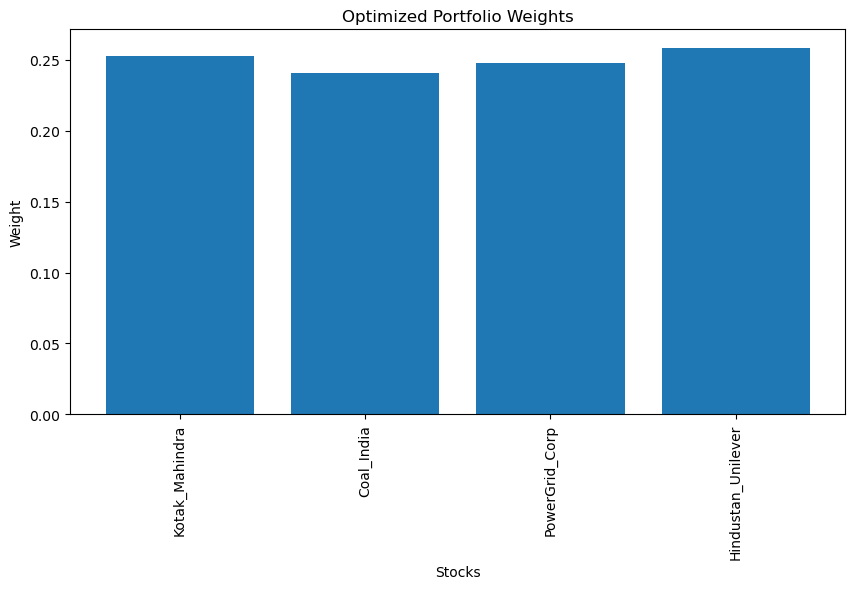

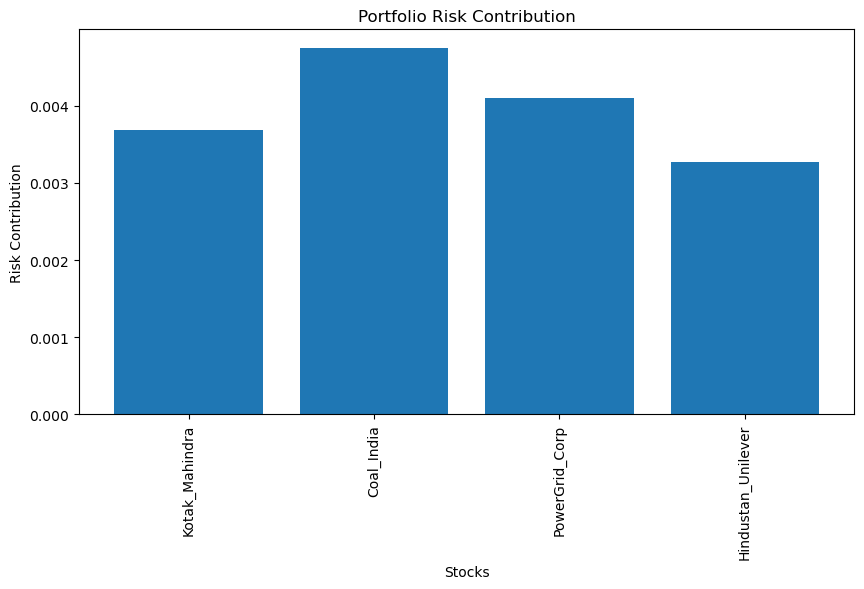

In [82]:
import matplotlib.pyplot as plt

# Plotting optimized weights
plt.figure(figsize=(10, 5))
plt.bar(final_cluster.keys(), optimized_weights)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

# Plotting portfolio risk contribution
plt.figure(figsize=(10, 5))
plt.bar(portfolio_risk_contribution.keys(), portfolio_risk_contribution.values())
plt.title('Portfolio Risk Contribution')
plt.xlabel('Stocks')
plt.ylabel('Risk Contribution')
plt.xticks(rotation=90)
plt.show()

In [83]:
final_optimized_weight

{'Kotak_Mahindra': 0.25281382931562596,
 'Coal_India': 0.24081368503701037,
 'PowerGrid_Corp': 0.247763153631068,
 'Hindustan_Unilever': 0.258609332016296}

In [84]:
print(expected_returns)

{'Kotak_Mahindra': 0.05116783424872523, 'Coal_India': 0.05157956718813402, 'PowerGrid_Corp': 0.051324440686986106, 'Hindustan_Unilever': 0.05101333228538822}


In [85]:
risk_free_rate = 0.05  # 5% annual risk-free rate

# Calculate portfolio expected return
portfolio_expected_return = sum(final_optimized_weight[stock] * expected_returns[stock] for stock in final_optimized_weight)

# Calculate portfolio volatility (standard deviation)
# Assuming you have calculated portfolio volatility using covariance matrix or GARCH model
portfolio_volatility =0.01 # Replace with actual portfolio volatility

# Calculate Sharpe ratio
sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility

print("Portfolio Expected Return:", portfolio_expected_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Portfolio Expected Return: 0.051265830830604056
Portfolio Volatility: 0.01
Sharpe Ratio: 0.12658308306040533
